## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])



In [3]:
# Determine the number of unique values in each column.
application_df.nunique()



APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

STATUS              Axes(0.125,0.712609;0.168478x0.167391)
ASK_AMT          Axes(0.327174,0.712609;0.168478x0.167391)
IS_SUCCESSFUL    Axes(0.529348,0.712609;0.168478x0.167391)
dtype: object

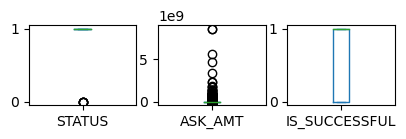

In [4]:
# check for outliers in data
application_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)


In [5]:
# count the number of outliers in ASK_AMT
outliers = application_df.ASK_AMT[application_df.ASK_AMT > 100000000].count()
outliers
application_df.ASK_AMT.describe()


count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [6]:
# remove the outliers in ASK_AMT
application_df = application_df[application_df.ASK_AMT < 100000000]
application_df.ASK_AMT.describe()

count    3.419800e+04
mean     4.285454e+05
std      3.668744e+06
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      6.960000e+03
max      9.848109e+07
Name: ASK_AMT, dtype: float64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts



APPLICATION_TYPE
T3     26945
T4      1542
T6      1216
T5      1172
T19     1065
T8       737
T7       725
T10      528
T9       151
T13       66
T12       26
T2        16
T25        3
T29        2
T15        2
T14        1
T17        1
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# increase cutoff value from 500 to 700
application_types_to_replace = list(application_type_counts[application_type_counts < 700].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15352\4223206904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


APPLICATION_TYPE
T3       26945
T4        1542
T6        1216
T5        1172
T19       1065
Other      796
T8         737
T7         725
Name: count, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts


CLASSIFICATION
C1000    17258
C2000     6059
C1200     4826
C3000     1917
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]


CLASSIFICATION
C1000    17258
C2000     6059
C1200     4826
C3000     1917
C2100     1883
C7000      775
C1700      286
C4000      194
C5000      116
C1270      113
C2700      104
C2800       94
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       19
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 1000].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15352\614334177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")


CLASSIFICATION
C1000    17258
C2000     6059
C1200     4826
Other     2255
C3000     1917
C2100     1883
Name: count, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.shape
application_df.columns


Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# increase number of neurons in first hidden layer from 10 to 80
# increase number of neurons in second hidden layer from 5 to 30
# add a third layer
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation='relu'))

# # add a third hidden layer
# nn.add(tf.keras.layers.Dense(units=5, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                688       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 977 (3.82 KB)
Trainable params: 977 (3.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [17]:
# Train the model
# increase number of epochs from 100 to 150
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50




In [ ]:
# evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5764 - accuracy: 0.7290 - 388ms/epoch - 1ms/step
Loss: 0.5763698816299438, Accuracy: 0.7290058732032776


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimisation.h5")




d:\Programs\Anaconda\envs\dev\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Hyperparameter Tuning
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
def create_model(optimizer='adam', activation='relu'):
    # create model
    model = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

    nn.add(tf.keras.layers.Dense(units=30, activation='relu'))


    nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    return model

# wrap the model using the function you created
nn = KerasClassifier(build_fn=create_model)



In [ ]:
# define hyperparameters to tune
param_grid = {
    "batch_size": [5, 10, 20, 40],
    "epochs": [50, 100, 150],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']		
}

# use GridSearchCV to  find the best paramter compbination

grid = GridSearchCV(estimator=nn, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

NameError: name 'X_train_scaled' is not defined